# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [159]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [61]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [62]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ixtapa
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | gereida
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | show low
Processing Record 8 of Set 1 | san jose del guaviare
Processing Record 9 of Set 1 | kingston
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | am djarass
City not found. Skipping...
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | maitum
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | jiazi
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | chartres
Processing Record 22 of Set 1 | bl

In [120]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [121]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ixtapa,20.7000,-105.2000,29.57,74,100,4.12,MX,1689729954
1,ilulissat,69.2167,-51.1000,8.01,93,100,0.00,GL,1689729954
2,bethel,41.3712,-73.4140,24.25,86,40,0.00,US,1689729954
3,keflavik,64.0049,-22.5624,10.24,81,0,6.17,IS,1689729954
4,gereida,11.2811,25.1414,26.03,65,84,5.26,SD,1689729955


In [122]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [123]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ixtapa,20.7000,-105.2000,29.57,74,100,4.12,MX,1689729954
1,ilulissat,69.2167,-51.1000,8.01,93,100,0.00,GL,1689729954
2,bethel,41.3712,-73.4140,24.25,86,40,0.00,US,1689729954
3,keflavik,64.0049,-22.5624,10.24,81,0,6.17,IS,1689729954
4,gereida,11.2811,25.1414,26.03,65,84,5.26,SD,1689729955


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [124]:
# store timestamp into a people-friendly format
_ = time.localtime(city_weather["dt"])
date = f"{_.tm_year}-{_.tm_mon}-{_.tm_mday}"

2023-7-18


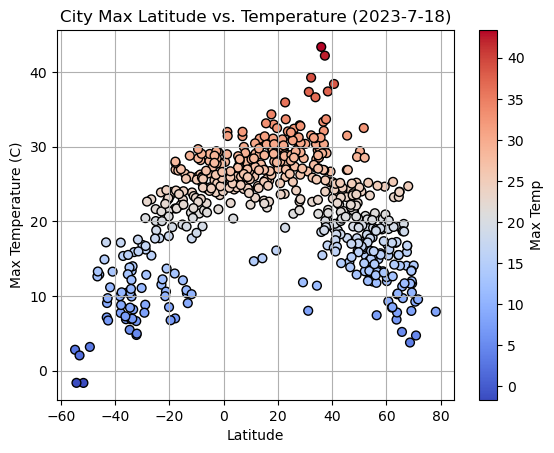

In [145]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat", "Max Temp", c='Max Temp', cmap=plt.colormaps.get_cmap('coolwarm'), s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# Note the Max Temp is skewed northerly, with a date in July

#### Latitude Vs. Humidity

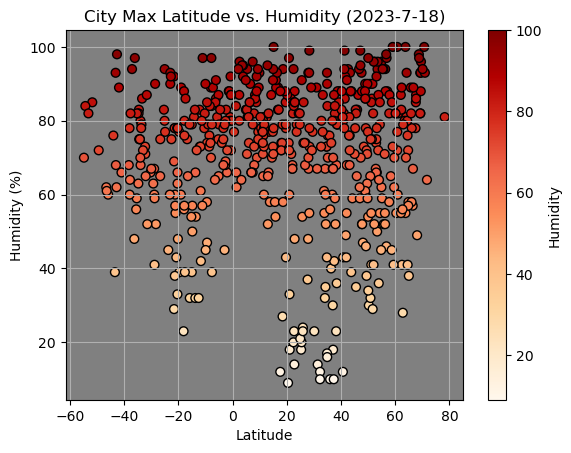

In [126]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat', 'Humidity', c='Humidity', cmap=plt.colormaps.get_cmap('OrRd'), s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.grid()
plt.gca().set_facecolor('grey')

# design question
# facecolor and colormap look pretty, but arguably 'too much'

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

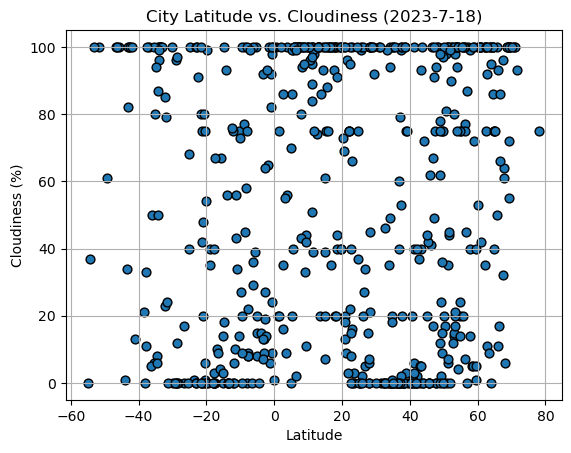

In [134]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat', 'Cloudiness', s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

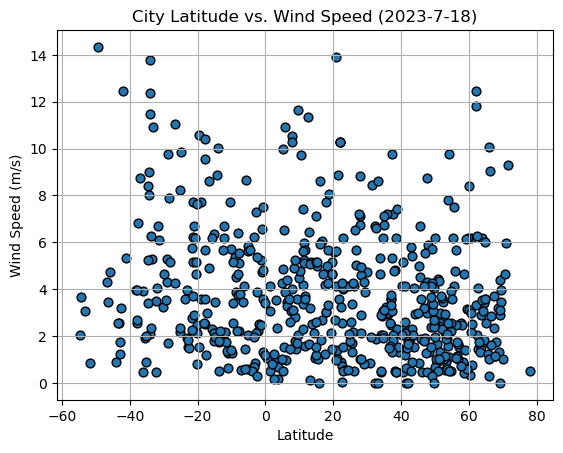

In [144]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat', 'Wind Speed', s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [193]:
# Define a function to create Linear Regression plots
def reg(df, x, y):
    df.plot.scatter(x, y)
    copy = df.copy()
    copy = copy.dropna(subset=[x, y])
    lr = linregress(copy[x], copy[y])
    tmp = lr.slope * copy[x] + lr.intercept
    plt.plot(copy[x], tmp, color='red')
    
    # print r-value

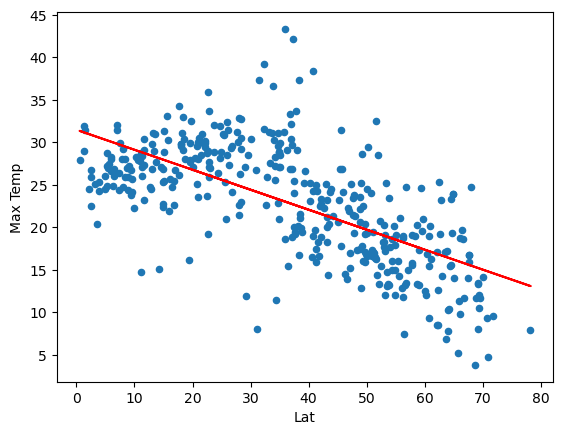

In [194]:
reg(northern_hemi_df, 'Lat', 'Max Temp')

In [147]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ixtapa,20.7000,-105.2000,29.57,74,100,4.12,MX,1689729954
1,ilulissat,69.2167,-51.1000,8.01,93,100,0.00,GL,1689729954
2,bethel,41.3712,-73.4140,24.25,86,40,0.00,US,1689729954
3,keflavik,64.0049,-22.5624,10.24,81,0,6.17,IS,1689729954
4,gereida,11.2811,25.1414,26.03,65,84,5.26,SD,1689729955


In [149]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port-aux-francais,-49.3500,70.2167,3.19,72,61,14.34,TF,1689729955
9,puerto natales,-51.7236,-72.4875,-1.63,85,100,0.83,CL,1689729955
11,adamstown,-25.0660,-130.1015,21.64,80,68,2.17,PN,1689729955
15,hithadhoo,-0.6000,73.0833,27.82,72,98,3.57,MV,1689729955
18,luderitz,-26.6481,15.1594,15.42,75,0,11.06,NaN,1689729956


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


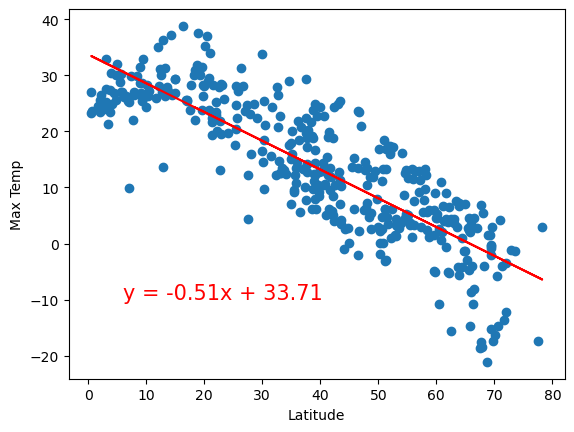

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


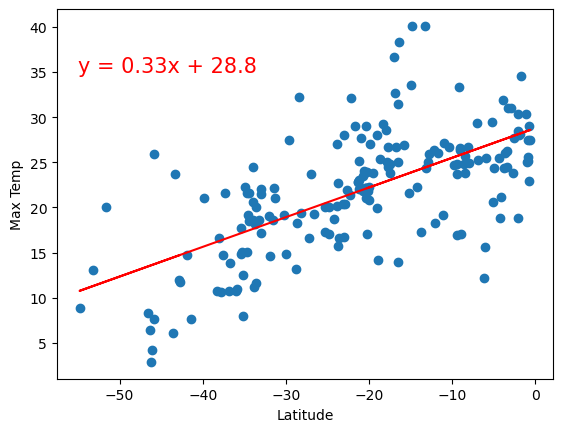

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


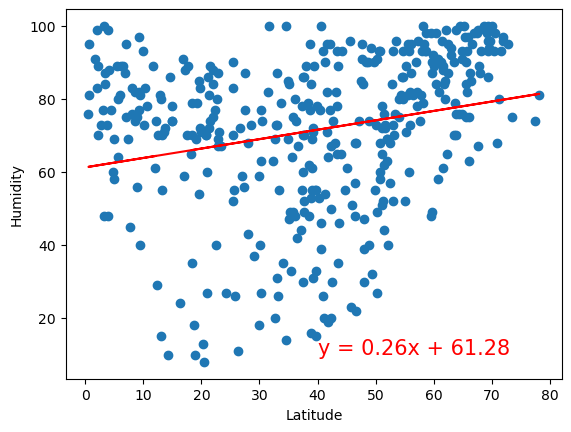

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


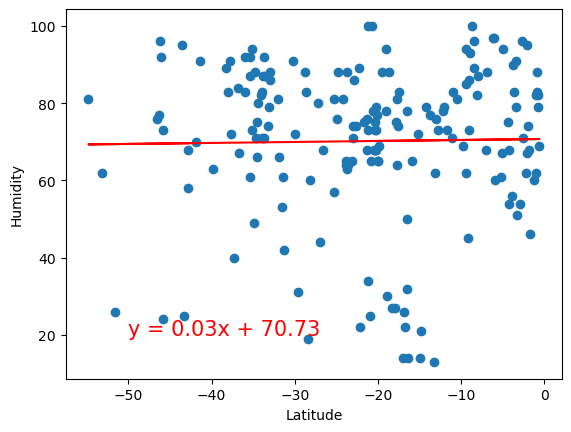

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


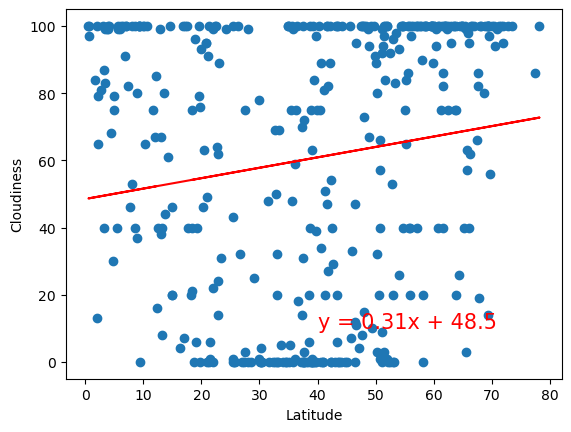

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


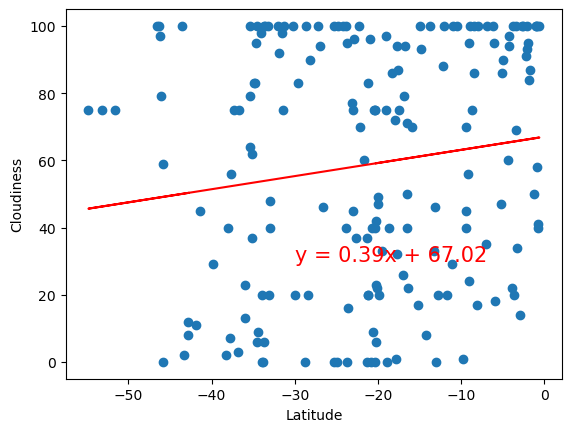

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


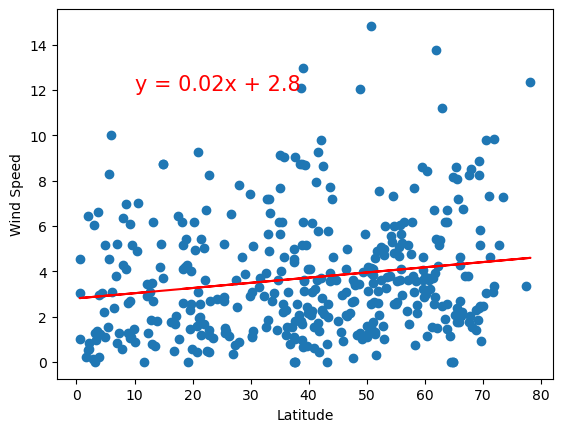

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


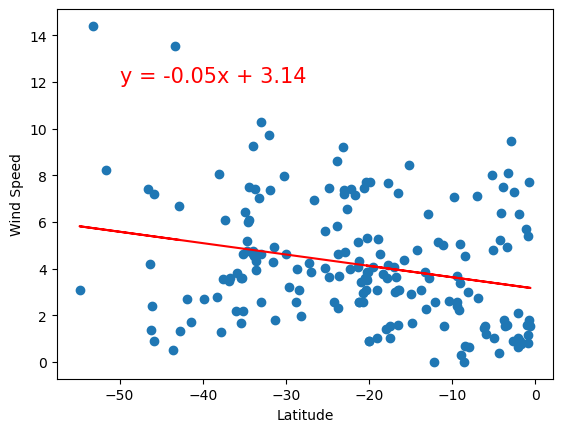

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE